# Model Visualization


In [110]:
%matplotlib inline
import copy
from itertools import product
import time
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mdp_lib.domains.gridworld import GridWorld
from planninginbeliefmodel import PlanningInObserverBeliefModel
from mdp_lib.domains.gridworldvis import visualize_trajectory, plot_text
from task import mdp_codes, mdp_params
from mdp_lib.util import sample_prob_dict
from util import mdp_to_feature_belief

path_to_sim_data = './cached_values/model_.pkl'
path_to_human_data = './cached_values/human_results.pkl'
path_to_mixture_data = './cached_values/mixture.pkl'
path_to_mixture_data_x = './cached_values/mixture_x.pkl'

In [112]:
def load_data(path):
    df = pd.read_pickle(path)
    df["rh"] = df["observer"].map(str) + '/' + df["demonstrator"]
    df["rh_mix"] = df["observer"].map(str) + '/' + df["demonstrator"]
    """
    is_doing = df['demonstrator'] == 'doing'
    df_doing = df[is_doing].copy()
    df_doing["rh_mix"] = df["observer"].map(str) + '/' + 'showing'
    df = df.append(df_doing, ignore_index=True)
    print(df.index)"""
    return df

# Plotting Doing (top row) versus Showing (bottom row) demonstrations

In [96]:
model_obs_judgments = load_data(path_to_human_data)

RangeIndex(start=0, stop=2784, step=1)
1392
RangeIndex(start=0, stop=4176, step=1)


[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>

[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'

[((0, 2), u'^'), ((0, 3), u'>'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'>'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'>'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'>'),

[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'v'), ((1, 1), u'v'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'v'), ((1, 1), u'v'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), (

[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), (

[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), (

[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'^'), ((4, 3), u'v'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'^'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'^'), ((4, 3), u'v'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), (

[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'^'), ((4, 3), u'v'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), (

[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'>'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'^'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'>'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), 

[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'^'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'^'), ((0, 3), u'>'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v')]
[((0, 2), u'>'), ((1, 2), u'^'),

[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'>'), ((1, 2), u'<'), ((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), (

[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'v'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), (

[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'^'), ((0, 1), u'^'), ((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'v'), ((0, 3), u'v'), ((0, 2), u'^')

[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'>'), ((2, 1), u'>'), ((3, 1), u'>'), ((4, 1), u'v'), ((4, 0), u'<'), ((3, 0), u'<'), ((2, 0), u'^'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'^'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'v'), ((4, 3), u'v'), ((4, 2), u'v'), ((4, 1), u'^')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'v'), ((2, 1), u'>'), ((3, 1), u'^'), ((3, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'^'), ((1, 1), u'>'), ((2, 1), u'>'), ((3, 1), u'>'), ((4, 1), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>')

[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'>'), ((2, 1), u'>'), ((3, 1), u'<'), ((2, 1), u'^'), ((2, 2), u'<'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'v'), ((2, 3), u'>'), ((3, 3), u'^'), ((3, 4), u'>'), ((4, 4), u'v'), ((4, 3), u'>')]
[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'^'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'v'), ((4, 3), u'<'), ((3, 3), u'<'), ((2, 3), u'<'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), (

[((0, 2), u'^'), ((0, 3), u'>'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'^'), ((0, 3), u'>'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'>'), ((2, 1), u'>'), ((3, 1), u'<'), ((2, 1), u'^'), ((2, 2), u'<'), ((1, 2), u'^'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'>'), ((1, 2), u'v'), ((1, 1), u'>'), ((2, 1), u'>'), ((3, 1), u'<'), ((2, 1), u'^'), ((2, 2), u'<'), ((1, 2), u'^'), ((1, 3), u'>'), ((2, 3), u'^'), ((2, 4), u'<'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'v'), ((3, 3), u'^'), ((3, 4), u'>'), ((4, 4), u'v'), ((4, 3), u'>')]
[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'v'), ((0, 1), u'>'), 

[((0, 2), u'>'), ((1, 2), u'v'), ((1, 1), u'v'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'v'), ((1, 3), u'v'), ((1, 2), u'v'), ((1, 1), u'v'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'v'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'<'), ((1, 0), u'^'), ((1, 1), u'^'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'<'), ((1, 0), u'<'), ((0, 0), u'>'), ((1, 0), u'^'), ((1, 1), u'^'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((

[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'^'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'<'), ((3, 4), u'>'), ((4, 4), u'<'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v')]
[((0, 2), u'>'), ((1, 2), u'<'), ((0, 2), u'>'), ((1, 2), u'<'), ((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'<'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'<'), ((4, 4), u'>'), ((5, 4), u'<'), ((4, 4), u'>'), ((5, 4), u'v')]
[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'^'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((

[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'^'), ((2, 1), u'^'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'^'), ((3, 1), u'<'), ((2, 1), u'^'), ((2, 2), u'>'), ((3, 2), u'^'), ((3, 3), u'>'), ((4, 3), u'v'), ((4, 2), u'v'), ((4, 1), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'^'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'^'), ((2, 1), u'^'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'^'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'v'), ((3, 2), u'v'), ((3, 1), u'v'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'^'), ((4, 3), u'<'), ((3, 3), u'<'), ((2, 3), u'v'), ((2, 2), u'v'), ((2, 1), u'>'), ((3, 1), u'>'), ((4, 1), u'^')]
[((

[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'>'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'^'), ((0, 1), u'^'), ((0, 2), u'v'), ((0, 1), u'^'), ((0, 2), u'^'), ((0, 3), u'v'), ((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'>'), ((2, 1), u'>'), ((3, 1), u'<'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'<'), ((3, 3), u'<'), ((2, 3), u'v'), ((2, 2), u'v'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'<'), ((4, 3), u'<'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[((0, 2), u'^'), ((0, 3), u'>'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>')]
[(

[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'<'), ((3, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'<'), ((3, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), 

[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'>'), ((2, 1), u'v'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^')]


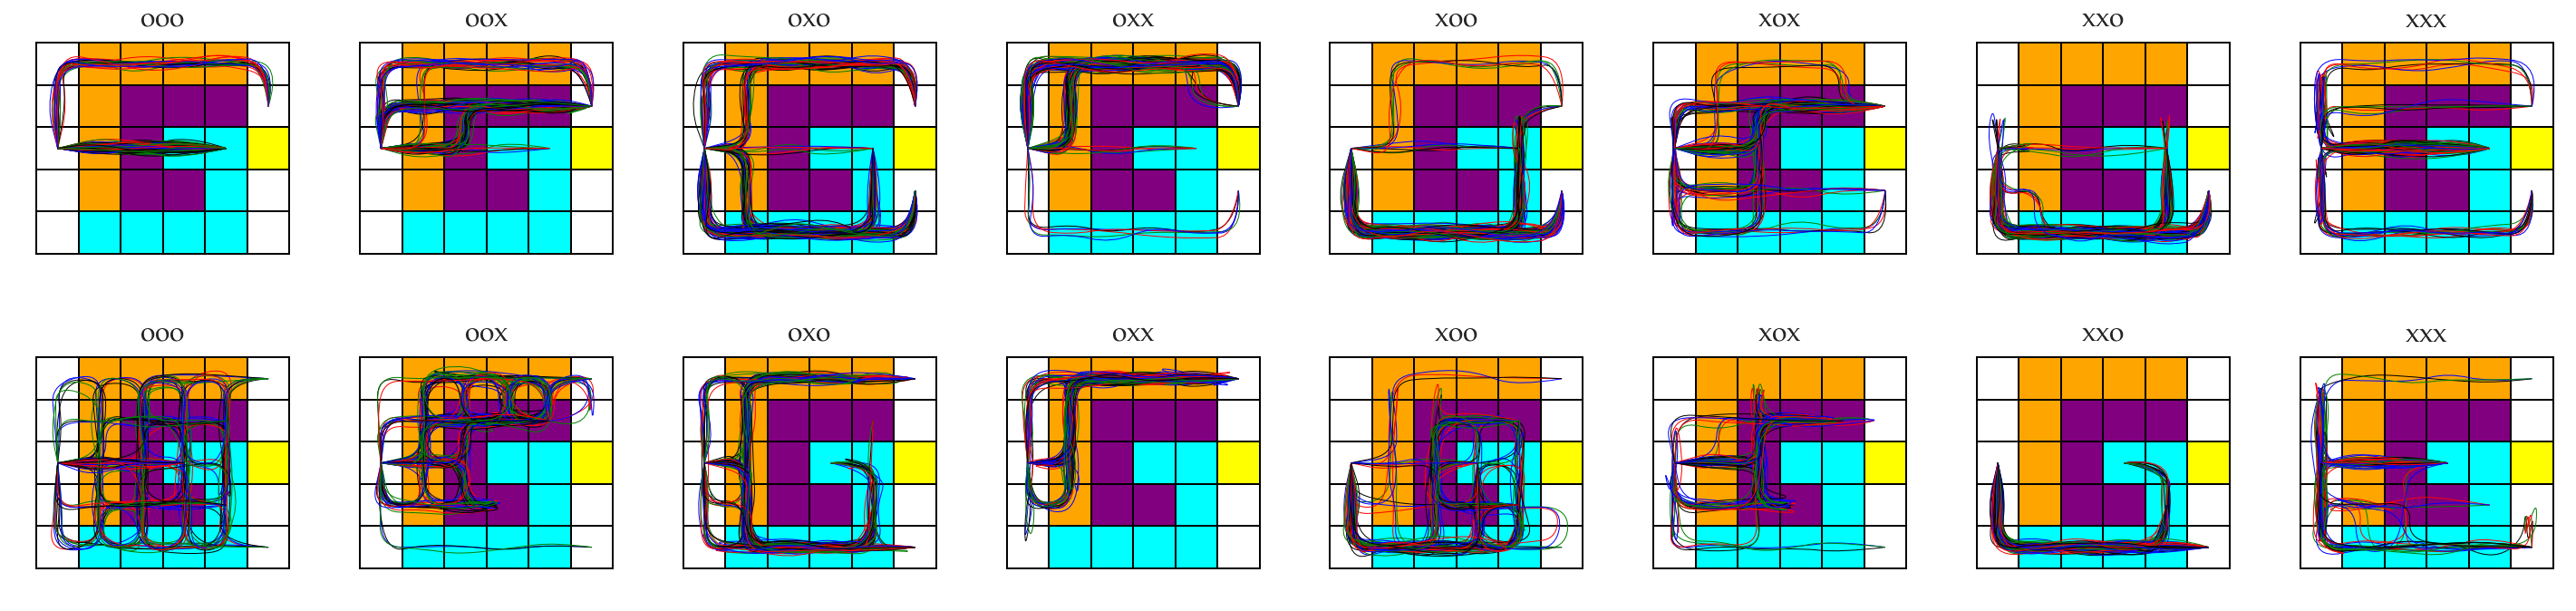

In [97]:
fig, axes = plt.subplots(2, 8, figsize=(40, 10))

only_obs_judg = model_obs_judgments[model_obs_judgments['observer'] == 'naive']
gw = GridWorld(**mdp_params[0])

colors = ['r','b','k','g']
for (dtype, rf), block in only_obs_judg.groupby(['demonstrator', 'rf']):
    ax = axes[['doing', 'showing'].index(dtype)][mdp_codes.index(rf)]
    gw.plot(ax=ax, feature_colors={'o':'orange', 'p':'purple', 'c':'cyan'})
    
    ti = 0
    for _, row in block.iterrows():
        if row['demonstrator'] == 'showing':
            traj = row['traj'][:-1]
        else:
            traj = row['traj']
        print(traj)
        visualize_trajectory(axis=ax, traj=traj, 
                             color=colors[ti % len(colors)])
        ti += 1
    ax.set_title(rf, fontsize=30)
plt.tight_layout()

# Demonstrator x Observer Correct Probability
This figure plots amount of probablity mass placed on the correct reward for a color (e.g. safe or dangerous) for each of the demonstrator and observer combinations.

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale=2.5, rc={"lines.linewidth": 3.0})
sns.set_style({'lines.linewidth': 12, 'lines.markersize': 10, 
               'lines.markeredgewidth': 2, 'errorbar.capsize': 2,
               'axes.titlesize': 24
})

In [70]:
from matplotlib import rc
rc("font", **{"family": "serif", "serif": ["Palatino"]})
rc("text", usetex = True)
rc("axes", **{"titlesize": 36, "labelsize": 30})
rc('text', usetex = True)

In [309]:
def plot_data(data, title='', filename=None, mixture=False, human=False, ymin=0.5):
    fig, ax = plt.subplots(figsize=(10, 10))
    if mixture:
        x = 'rh_mix'
    else:
        x = 'rh'
        is_ss = data['rh'] == 'sophisticated/showing'
        print(data[is_ss]['correct'].mean())
    g = sns.barplot(data=data,
                    y='correct', x=x,
                    order=['sophisticated/showing', 'naive/showing', 'naive/doing', 'sophisticated/doing'],
                    #hue='demonstrator', hue_order=['doing', 'showing'],
                    palette=sns.light_palette("#60049F", reverse=True)[1:],
                    capsize=.05, errwidth=2, ax=ax)
    plt.ylim(ymin, 1.02)
    g.set(yticks=np.linspace(ymin, 1, 3))
    ax.set_ylabel('Accuracy of Inferred Reward')
    if human:
        ax.set_xticklabels(['Pedagogic $\mathbf{R}$ \n Pedagogic $\mathbf{AH}$', 
                                'Literal $\mathbf{R}$ \n Pedagogic $\mathbf{AH}$',
                                'Literal $\mathbf{R}$ \n Literal $\mathbf{AH}$',
                                'Pedagogic $\mathbf{R}$ \n Literal $\mathbf{AH}$'
                               ], fontsize=20)
    else:
        ax.set_xticklabels(['Pedagogic $\mathbf{R}$ \n Pedagogic $\mathbf{H}$', 
                                'Literal $\mathbf{R}$ \n Pedagogic $\mathbf{H}$',
                                'Literal $\mathbf{R}$ \n Literal $\mathbf{H}$',
                                'Pedagogic $\mathbf{R}$ \n Literal $\mathbf{H}$'
                               ])
    ax.set_xlabel('Robot/Human Pairs', labelpad=12)
    ax.set_title(title)
    if filename is not None:
        fig.savefig('/Users/smitha/proj/ml/human_misspec/figs/pedagogy/{0}.pdf'.format(filename))

In [267]:
def plot_mixture_acts(data, title='', filename=None):
    fig, ax = plt.subplots(figsize=(10, 10))
    showing_data = data[data['demonstrator'] == 'showing']
    g = sns.lineplot(data=showing_data, y='correct', x='mixture', hue='observer'), 
                     #marker='o', markersize=10)#, markerfacecolor='white')
    ax.set_ylabel('Accuracy of Inferred Reward')
    ax.set_xlabel('Probability of Pedagogic Action (' + r'$\alpha$' + ')')
    ymin, ymax = 0.65, 1.02
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(0, 1)
    
    px = ax.lines[1].get_xdata()
    py = ax.lines[1].get_ydata()
    # Plot per individual point
    human_y = 0.90445
    human_x = np.interp(human_y, py, px)
    human_line_color = 'gray'
    plt.hlines(y=human_y, xmin=0, xmax=human_x, color=human_line_color, linestyle='--', linewidth=2)
    plt.vlines(x=human_x, ymin=ymin, ymax=human_y, color=human_line_color, linestyle='--', linewidth=2)
    ax.plot(human_x, human_y, marker='o', markersize=10, markerfacecolor='white', color=human_line_color, label='Per Human Estimate')
    
    # Plot population point
    pop_x = 0.5
    pop_y = np.interp(pop_x, px, py)
    pop_line_color = 'black'
    plt.vlines(x=pop_x, ymin=ymin, ymax=pop_y, color=pop_line_color, linestyle='--', linewidth=2)
    plt.hlines(y=pop_y, xmin=0, xmax=pop_x, color=pop_line_color, linestyle='--', linewidth=2)
    ax.plot(pop_x, pop_y, marker='o', markersize=10, markerfacecolor='white', color=pop_line_color, label='Population Estimate')
    plt.title(title)
    
    human_xlabel = np.round(human_x, 2)
    plt.yticks([0.65, 0.8, human_y, pop_y, 1], [0.65, 0.8, np.round(human_y, 2), np.round(pop_y, 2), 1])
    plt.xticks([0, human_x, pop_x, 0.75, 1], [0, human_xlabel, pop_x, 0.75, 1])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[1:], ['Literal Robot', 'Pedagogic Robot', 'Per Human Estimate', 'Population Estimate'], loc='lower right')
    if filename is not None:
        fig.savefig('/Users/smitha/proj/ml/human_misspec/figs/pedagogy/{0}.pdf'.format(filename))

In [304]:
def boostrap_estimate(df, mixture_prob, num_samples=100):
    num_rows = len(df)
    laccs, paccs = [], []
    for _ in range(num_samples):
        sample = df.sample(num_rows, replace=True)
        lacc, pacc = calculate_accs(sample, mixture_prob)
        laccs.append(lacc)
        paccs.append(pacc)
    l0, l1 = np.percentile(laccs, 2.5), np.percentile(laccs, 97.5)
    p0, p1 = np.percentile(paccs, 2.5), np.percentile(paccs, 97.5)
    return l0, l1, p0, p1
    
def calculate_accs(data, mixture_prob):
    pp_acc = data[data['rh'] == 'sophisticated/showing']['correct'].mean()
    pl_acc = data[data['rh'] == 'sophisticated/doing']['correct'].mean()
    lp_acc = data[data['rh'] == 'naive/showing']['correct'].mean()
    ll_acc = data[data['rh'] == 'naive/doing']['correct'].mean()
    literal_acc = ll_acc*(1-mixture_prob) + lp_acc*mixture_prob
    ped_acc = pl_acc*(1-mixture_prob) + pp_acc*mixture_prob
    return literal_acc, ped_acc

def calc_mixture_traj_data(data, mixtures):
    pp_acc = data[data['rh'] == 'sophisticated/showing']['correct'].mean()
    pl_acc = data[data['rh'] == 'sophisticated/doing']['correct'].mean()
    lp_acc = data[data['rh'] == 'naive/showing']['correct'].mean()
    ll_acc = data[data['rh'] == 'naive/doing']['correct'].mean()
    print(pp_acc, pl_acc, lp_acc, ll_acc)
    literal_accs = []
    pedagogic_accs = []
    literal_lcs, literal_ucs = [], []
    ped_lcs, ped_ucs = [], []
    for mixture_prob in mixtures:
        literal_acc = ll_acc*(1-mixture_prob) + lp_acc*mixture_prob
        ped_acc = pl_acc*(1-mixture_prob) + pp_acc*mixture_prob
        literal_accs.append(literal_acc)
        pedagogic_accs.append(ped_acc)
        literal_lc, literal_uc, ped_lc, ped_uc = boostrap_estimate(data, mixture_prob)
        literal_lcs.append(literal_lc)
        literal_ucs.append(literal_uc)
        ped_lcs.append(ped_lc)
        ped_ucs.append(ped_uc)
    return literal_accs, pedagogic_accs, literal_lcs, literal_ucs, ped_lcs, ped_ucs

def plot_mixture_trajs(data, mixtures, title='', filename=None):
    literal_accs, pedagogic_accs, literal_lcs, literal_ucs, ped_lcs, ped_ucs = calc_mixture_traj_data(data, mixtures)
        
    fig = plt.figure()
    ax = fig.gca()
    fig.set_size_inches((10, 10))
    sns.lineplot(mixtures, literal_accs, label='Literal Robot')#, marker='o', markerfacecolor='white')
    sns.lineplot(mixtures, pedagogic_accs, label='Pedagogic Robot')#, marker='o', markerfacecolor='white'
    print(literal_lcs)
    print(literal_ucs)
    print(ped_lcs)
    print(ped_ucs)
    plt.fill_between(mixtures, literal_lcs, literal_ucs, alpha=0.25)
    plt.fill_between(mixtures, ped_lcs, ped_ucs, alpha=0.25)
    ymin=0.65
    ax.set_ylim(ymin, 1.02)
    ax.set_xlim(0, 1)
    
    px = ax.lines[1].get_xdata()
    py = ax.lines[1].get_ydata()
    x = 0.7
    y = np.interp(x, px, py)
    plt.hlines(y=y, xmin=0, xmax=x, color='black', linestyle='--', linewidth=2)
    plt.vlines(x=x, ymin=ymin, ymax=y, color='black', linestyle='--', linewidth=2)
    ax.plot(x, y, color='black', marker='o', markersize=10, markerfacecolor='white', label='Population Estimate')#, color=pop_line_color, label='Population Estimate')
    
    plt.legend()
    plt.ylabel('Accuracy of Inferred Reward')
    plt.yticks([ymin, 0.8, y, 1], [ymin, 0.8, np.round(y, 2), 1])
    plt.xticks([0, 0.25, 0.5, 0.7, 1], [0, 0.25, 0.5, 0.7, 1])
    plt.xlabel('Probability of Pedagogic Human')
    plt.title(title)
    if filename is not None:
        fig.savefig('/Users/smitha/proj/ml/human_misspec/figs/pedagogy/{0}.pdf'.format(filename))

In [175]:
mixture_x_data = load_data(path_to_mixture_data_x)

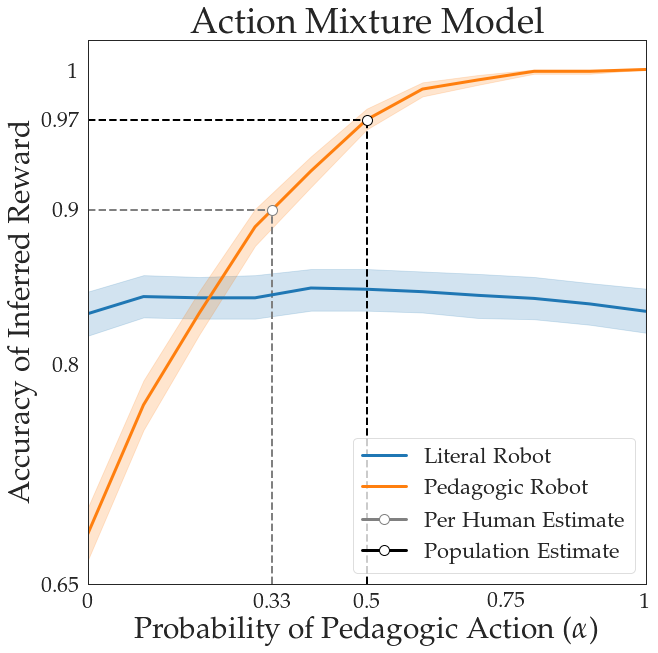

In [271]:
plot_mixture_acts(mixture_x_data, title='Action Mixture Model', filename='mixture_acts')

(1.0, 0.6820833333333334, 0.8395833333333333, 0.8254166666666667)
[0.814919861866938, 0.816075943528207, 0.8198975660395685, 0.8212742074182244, 0.8233435463750861, 0.8243605049121577, 0.8241496547759056, 0.8272709022218575, 0.8234762111605458, 0.8254560255412424]
[0.8355371487251084, 0.8353739796134573, 0.8359821088788364, 0.839680718886768, 0.8394080896804199, 0.8426737606616649, 0.8450552995850044, 0.8481639774239945, 0.8511020041958096, 0.8547809065879362]
[0.6690631412851418, 0.7081224392852349, 0.743584560655346, 0.7791457153967688, 0.8169643442085953, 0.853690579526007, 0.8896732237322027, 0.9261534458477656, 0.9630206460644979, 1.0]
[0.6935363798913418, 0.7286375459538705, 0.7624284931319152, 0.7967974099310396, 0.8301007683514586, 0.8643444730145728, 0.8989007660353674, 0.9318216801429848, 0.9659127180392046, 1.0]


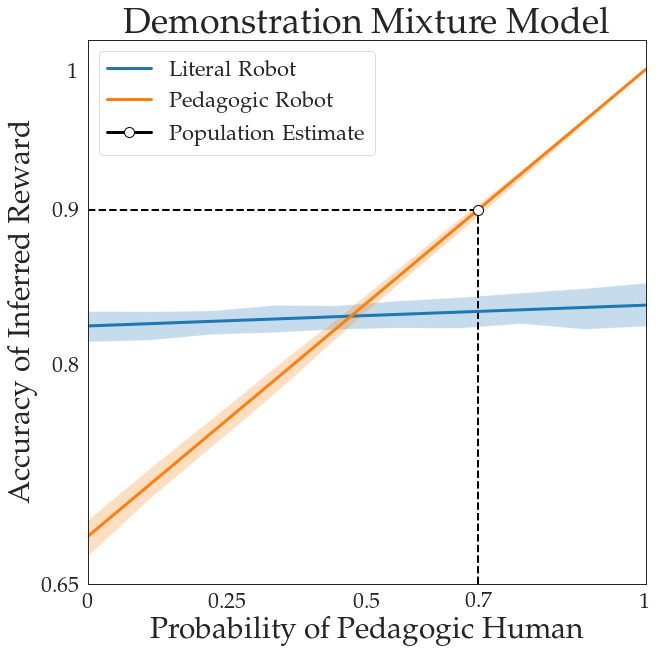

In [305]:
plot_mixture_trajs(sim_data, np.linspace(0, 1, 10), 'Demonstration Mixture Model', 'mixture')

In [128]:
mixture_data = load_data(path_to_mixture_data)

0.9044540229885057


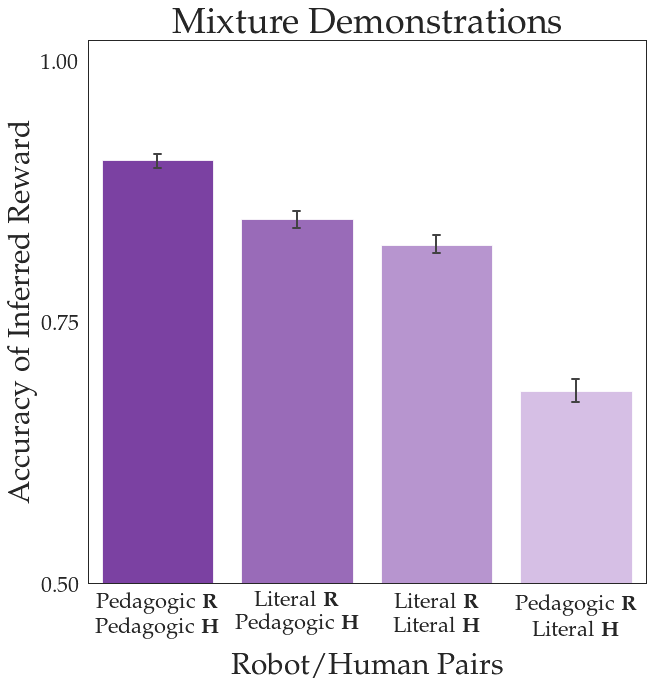

In [159]:
plot_data(mixture_data, title='Mixture Demonstrations', filename='mix_results')

In [108]:
mixture_data_05 = load_data(path_to_mixture_data_05)

RangeIndex(start=0, stop=27840, step=1)
13920
RangeIndex(start=0, stop=41760, step=1)


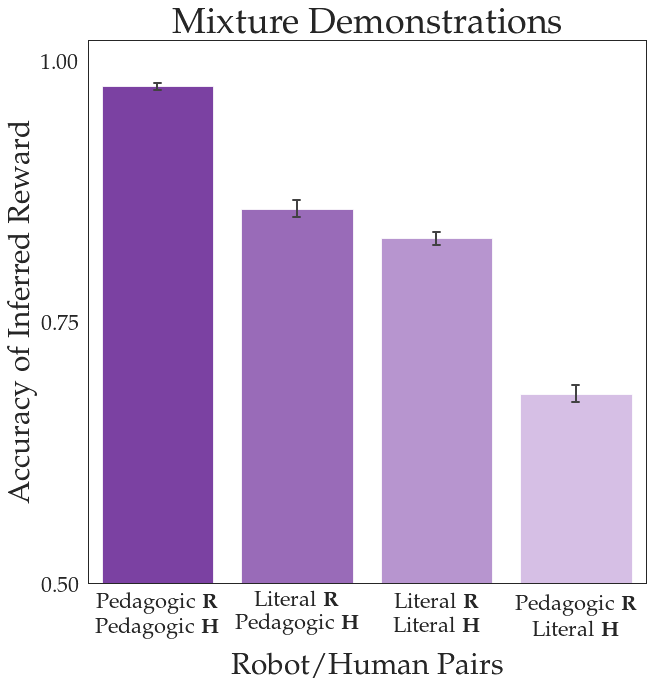

In [109]:
plot_data(mixture_data_05, title='Mixture Demonstrations', filename='mix_results_05')

In [23]:
sim_data = load_data(path_to_sim_data)

RangeIndex(start=0, stop=9600, step=1)
4800
RangeIndex(start=0, stop=14400, step=1)


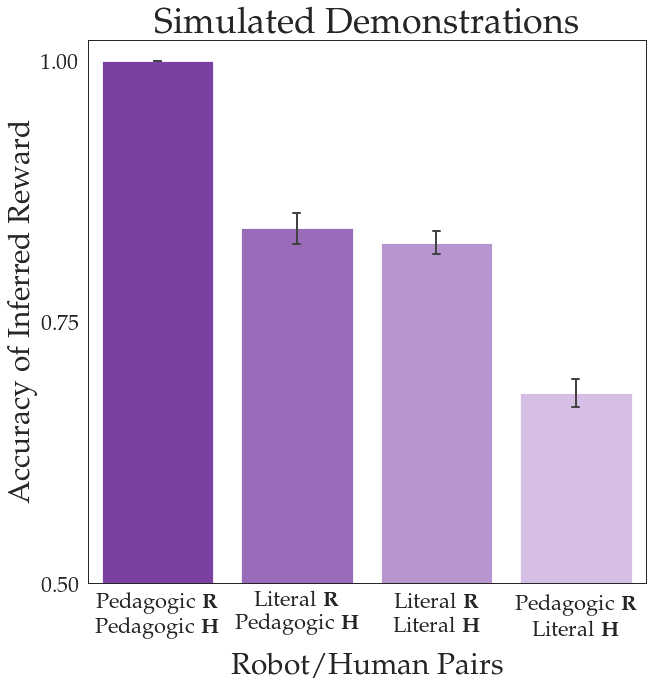

In [84]:
plot_data(sim_data, title='Simulated Demonstrations', filename='sim_results')

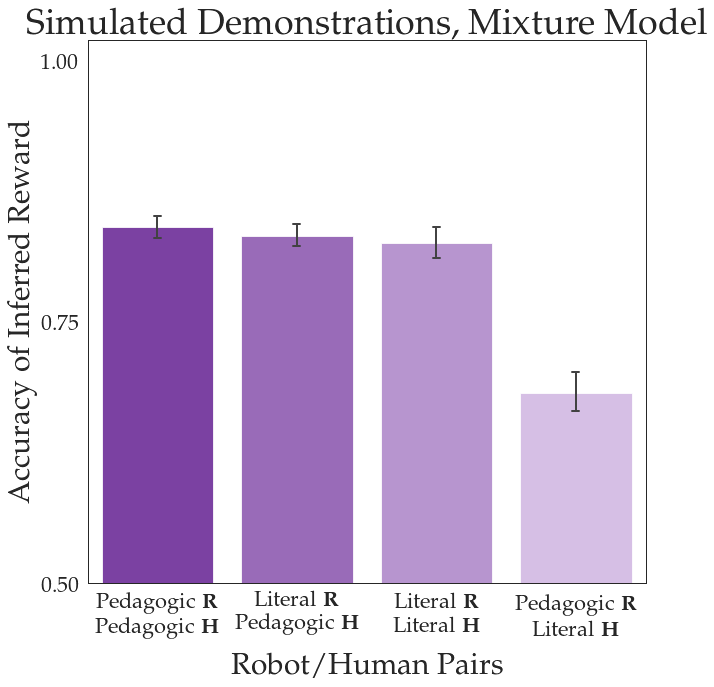

In [82]:
plot_data(sim_data, title='Simulated Demonstrations, Mixture Model', filename='sim_mixture_results', mixture=True)

0.8405172413793104


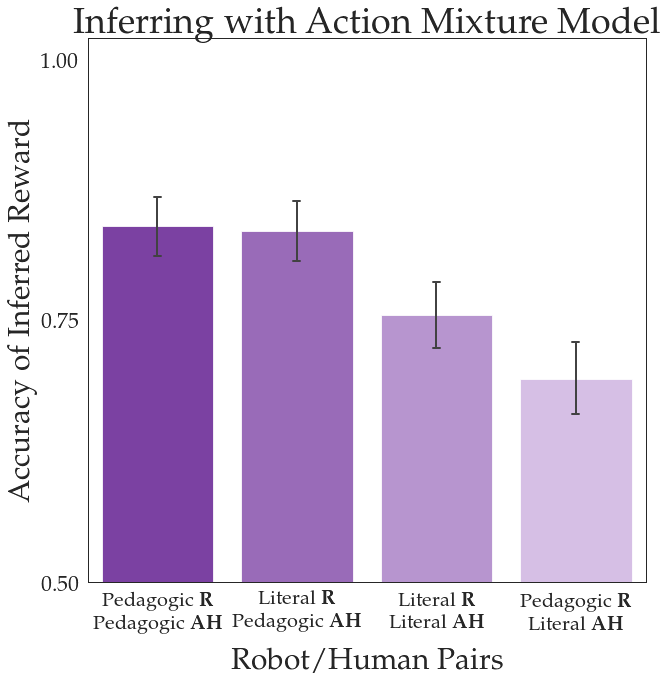

In [320]:
infer_with_mix_data = load_data('./cached_values/infer_with_mix.pkl')
plot_data(infer_with_mix_data, title='Inferring with Action Mixture Model', mixture=False, human=True, ymin=0.5)

In [327]:
human_data = load_data(path_to_human_data)

0.8405172413793104


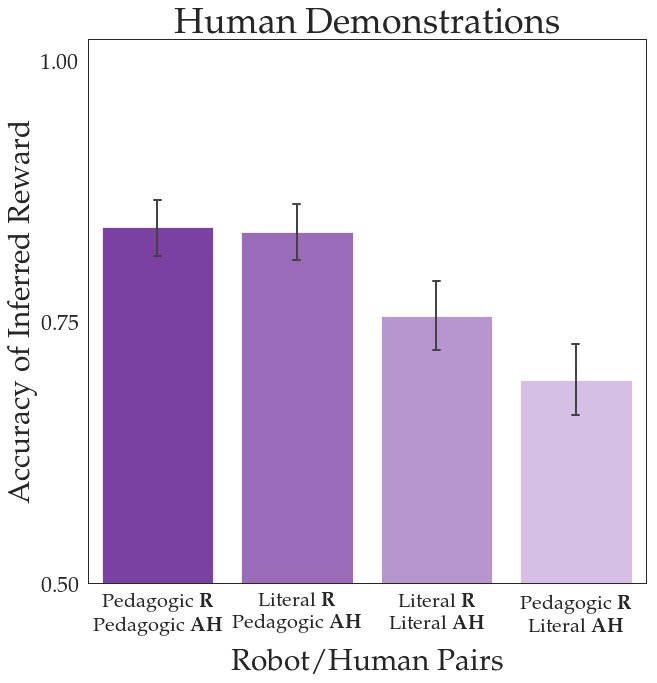

In [328]:
plot_data(human_data, title='Human Demonstrations', filename='human_results', mixture=False, human=True)

# Likelihood and Posterior Prob

In [ ]:
def plot_ll(ylabel='', filename=None):
    # Following values are calculated in Model_Simulations notebook
    data = [{'human': 'literal', 'Human Model': 'Literal', 'll': 21.11288195803672},
            {'human': 'literal', 'Human Model': 'Pedagogic', 'll': 28.0774046726638},
            {'human': 'pedagogic', 'Human Model': 'Literal', 'll': 42.99551940614264},
            {'human': 'pedagogic', 'Human Model': 'Pedagogic', 'll': 26.92586380495133}]
    data = pd.DataFrame(data)
    print(data)
    fig, ax = plt.subplots(figsize=(10, 10))
    g = sns.barplot(data=data,
                    y='ll', x='human',
                    order=['literal', 'pedagogic'],
                    hue='Human Model', hue_order=['Literal', 'Pedagogic'],
                    palette=['#4852CF', sns.light_palette("#60049F", reverse=True)[1]],
                    capsize=.05, errwidth=2, ax=ax)
    #plt.ylim(.5, 1.02)
    #g.set(yticks=[.5, .75, 1.0])
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(['Literal Human', 'Pedagogic Human'])
    ax.set_xlabel('Actual Human Type', labelpad=12)
    #ax.set_title(title)
    if filename is not None:
        fig.savefig('/Users/smitha/proj/ml/human_misspec/figs/pedagogy/{0}.pdf'.format(filename))

In [ ]:
plot_ll('Mean Negative Log-Likelihood', 'll')

In [ ]:
def calc_pp(data):
    pp = {
        'doing': {'naive': 0, 'sophisticated': 0}, 
        'showing': {'naive': 0, 'sophisticated': 0}
    }
    for index, row in data.iterrows():
        if row['correct_prob'] == 0:
            print(row['observer'])
            continue
        try:
            log_pp = np.log(row['correct_prob'])
            pp[row['demonstrator']][row['observer']] += -log_pp
        except:
            print(row['correct_prob'])
    return pp

# Beliefs over time
This plot compares the evolution of beliefs over time between the two observer interpretation models.

In [ ]:
plot_rf = 'oox'
plot_demonstrator = 'doing'
plot_i = 0

In [ ]:
belief_trajs = model_obs_judgments[['demonstrator', 'rf', 'traj',
                                    'observer', 'belief_traj', ]]
belief_trajs.traj = belief_trajs.traj.apply(tuple)
belief_trajs = belief_trajs.drop_duplicates(['demonstrator', 'rf', 'traj', 'observer'])
traj_block = belief_trajs[(belief_trajs.rf == plot_rf) & 
                          (belief_trajs.demonstrator == plot_demonstrator)]
wtraj = traj_block.traj.iloc[0]
traj_block = traj_block[traj_block.traj == wtraj]
obs_b = traj_block[traj_block.observer == 'naive'].iloc[plot_i]['belief_traj']
sobs_b = traj_block[traj_block.observer == 'sophisticated'].iloc[plot_i]['belief_traj']

forder = ['orange', 'purple', 'cyan']
obs_b = pd.DataFrame([mdp_to_feature_belief(b, mdp_codes, forder) for b in obs_b])
obs_b['step'] = obs_b.index
obs_b['observer'] = 'naive'
sobs_b = pd.DataFrame([mdp_to_feature_belief(b, mdp_codes, forder) for b in sobs_b])
sobs_b['step'] = sobs_b.index
sobs_b['observer'] = 'sophisticated'

b_trajs = pd.concat([obs_b, sobs_b])
b_trajs = pd.melt(b_trajs, id_vars=['step', 'observer'], 
                  value_vars=['cyan', 'orange', 'purple'],
                  value_name='exp_safe', var_name='color')

In [ ]:
ax = gw.plot(feature_colors={'o': 'orange', 'p': 'purple', 'c': 'cyan'})
visualize_trajectory(axis=ax, traj=wtraj[:-1])
sns.factorplot(data=b_trajs, x='step', y='exp_safe',
               hue='color', 
               palette={'cyan':'cyan', 'orange':'orange', 'purple':'purple'},
               col='observer', col_order=['naive', 'sophisticated'])